In [7]:
#Passkey puller
#I did have to modify the file location based on the computer on using: ie laptop vs desktop
import json

with open('C:\\Users\\aaron_k2cr2v\OneDrive\Documents\GitHub\secrets_20230508.json') as f:
    data = json.load(f)
    secret_key = str(data['mongodb'])

#print(f"My key is "+len(secret_key)+" long.")



In [2]:
#All borrowed from Profs guides

import pymongo
import certifi

# Once you have retrieved your connection string from a secrets file, use it here
mongo_connection_string = data['mongodb']

# Connect to the database using known good certificates
client = pymongo.MongoClient(mongo_connection_string, tlsCAFile=certifi.where())

# Fetch the database named "DA320"
da320_database = client['DA320']

# Within the database we have "collections". Think of them as tables in SQL.
allCollections = da320_database.list_collection_names()

# Here is the list of collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 6.0.6.
This database has the collections ['imdb', 'metacritic']


In [34]:
import pandas as pd

# Retrieve all records from a collection - this can be a large amount of data!
cursor = da320_database["imdb"].find()

# Convert this information into a Pandas dataframe
imdb = pd.DataFrame(cursor)

# Make sure we've read the information correctly
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6450750e1aec9a1196b6939d,78111,Pretty Baby,110.0,6.5,10881,TV-MA,1/1/1978,NaN,NaN,NaN,Drama,"Brooke Shields, Keith Carradine, Susan Sarando...",Louis Malle,"Louis Malle, Polly Platt",Paramount Pictures
1,6450750e1aec9a1196b6939e,11354364,Reveal,130.0,4.6,1508,NaN,11/29/2019,NaN,NaN,NaN,"Mystery, Thriller","Aadhya Aaradhana, Advith Narayanankutty, Sudha...",Murali .S.V.,Jayasudha K.,Sri Manjunatha Cine Combines
2,6450750e1aec9a1196b6939f,77766,Jaws 2,116.0,5.8,77535,PG,6/16/1978,20000000.0,9866023.0,NaN,"Adventure, Horror, Thriller","Roy Scheider, Lorraine Gary, Murray Hamilton, ...",Jeannot Szwarc,"Joe Alves, David Brown, Richard D. Zanuck","Universal Pictures, Zanuck/Brown Productions"
3,6450750e1aec9a1196b693a4,77269,The Boys from Brazil,125.0,7.0,27910,R,8/19/1978,12000000.0,NaN,NaN,"Drama, Mystery, Sci-Fi, Thriller","Gregory Peck, Laurence Olivier, James Mason, L...",Franklin J. Schaffner,"Robert Fryer, Stanley O'Toole, Martin Richards","Sir Lew Grade, Producers Circle, ITC Films"
4,6450750e1aec9a1196b693a8,77372,Corvette Summer,105.0,5.6,3251,PG,6/2/1978,9000000.0,NaN,NaN,"Adventure, Comedy","Mark Hamill, Annie Potts, Eugene Roche, Willia...",Matthew Robbins,Hal Barwood,"Metro-Goldwyn-Mayer, Plotto Productions"


In [ ]:
#Basic scatter plot, noted out due to process-time clean up
#from matplotlib import pyplot
#import numpy as np

# Plot runtimes in a distribution histogram
#pyplot.title('Budgets across Time')
#pyplot.xlabel('Release Date')
#pyplot.ylabel('Budget')

#pyplot.scatter(imdb['release_date'], imdb['budget'])

#pyplot.show()

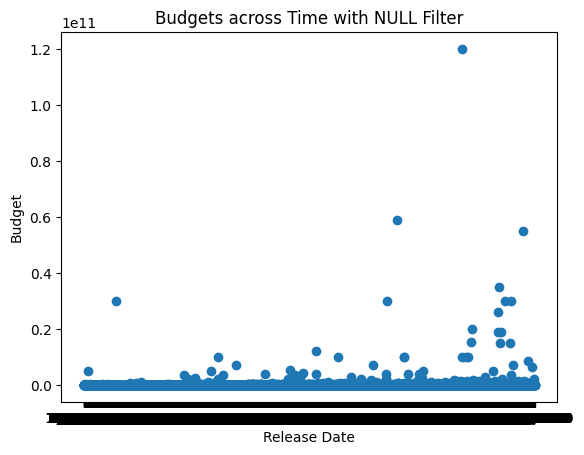

In [24]:
#Improved from base run

from matplotlib import pyplot
import numpy as np

# Plot runtimes in a distribution histogram
pyplot.title('Budgets across Time with NULL Filter')
pyplot.xlabel('Release Date')
pyplot.ylabel('Budget')

#Base data has a tone of NULLs in the budget column, this reduced process time from 35.7s to 24.8s
imdb_df = imdb[~imdb['budget'].isnull()]

pyplot.scatter(imdb_df['release_date'], imdb_df['budget'])

pyplot.show()

In [33]:
#Pulling some anomalies on the budget scatter plot
query =   { "budget": { "$lt": 100 } }
cursor = da320_database["imdb"].find(query)
imdb = pd.DataFrame(cursor)
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6450750f1aec9a1196b69f44,97758,Little Monsters,100,6.0,13041,PG,8/25/1989,20,NaN,NaN,"Adventure, Comedy, Family, Fantasy","Fred Savage, Howie Mandel, Daniel Stern, Marga...",Richard Greenberg,"Dori Berinstein, Mitchell Cannold, John Davis,...","Davis Entertainment, Licht/Mueller Film Corpor..."
1,645075101aec9a1196b6a40d,349113,Ax 'Em,71,1.2,2006,Unrated,1/29/1992,10,NaN,184.0,"Comedy, Horror, Mystery, Thriller","Michael Mfume, Sandra Pulley, Joe Clair, Racqu...",Michael Mfume,Michael Mfume,2 Smooth Film Productions
2,645075111aec9a1196b6b020,187457,Nothing About Robert,107,6.4,1030,Not Rated,2/13/1999,4,NaN,NaN,"Comedy, Drama","Fabrice Luchini, Sandrine Kiberlain, Valentina...",Pascal Bonitzer,"Catherine Chouridis, Philippe Liégeois, Jean-M...","Rézo Films, Assise Productions, France 2 Ciném..."
3,645075131aec9a1196b6c23f,772152,Amateur Porn Star Killer,71,3.7,2635,X,7/30/2006,45,NaN,NaN,"Crime, Horror","Michiko Jimenez, Jan Gould, Shane Ryan-Reid",Shane Ryan-Reid,"Kelley Daniel, Nikki Nishimoto, Shane Ryan-Rei...",Alter Ego Cinema
4,645075141aec9a1196b6c71e,890886,The Black Madonna,88,5.2,1028,Not Rated,3/9/2007,19,NaN,NaN,"Action, Comedy, Drama, Romance","Anders W. Berthelsen, Tuva Novotny, Nicolas Br...",Lasse Spang Olsen,"Per Holst, Christel C.D. Karlsen, Kim Magnusson","Nordisk Film, TV2 Danmark, Det Danske Filminst..."


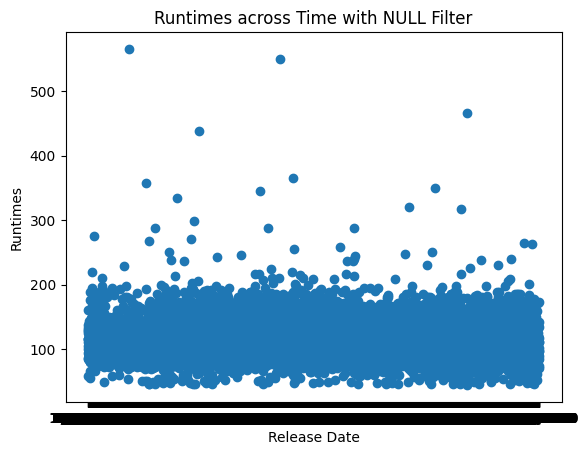

In [32]:
#Tested a Null remover for this data, not much found. Process-times are both ~36s
from matplotlib import pyplot
import numpy as np

# Plot runtimes in a distribution histogram
pyplot.title('Runtimes across Time with NULL Filter')
pyplot.xlabel('Release Date')
pyplot.ylabel('Runtimes')

pyplot.scatter(imdb['release_date'], imdb['runtime'])

pyplot.show()

In [27]:
#Pulling some anomalies on the runtime scatter plot
query =  {"runtime": {"$gt": 550}}
cursor = da320_database["imdb"].find(query)
imdb = pd.DataFrame(cursor)
imdb.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,6450750f1aec9a1196b69aba,90015,Shoah,566,8.7,9396,Not Rated,4/30/1985,None,None,None,"Documentary, History, War","Simon Srebnik, Michael Podchlebnik, Motke Zaïd...",Claude Lanzmann,", , , ,","British Broadcasting Corporation, Historia, Le..."
1,645075121aec9a1196b6b627,389448,Tie Xi Qu: West of the Tracks,551,8.2,1163,None,6/21/2002,None,None,None,Documentary,", , , ,",Bing Wang,"Bing Wang, Zhu Zhu","Wang Bing Film Workshop, The Hubert Bals Fund ..."


I think the process I built for this Jupyter Notebook is a good start on data processing and includes some time improvements.